Balanced Accuracy: 0.92
AUC: 0.92


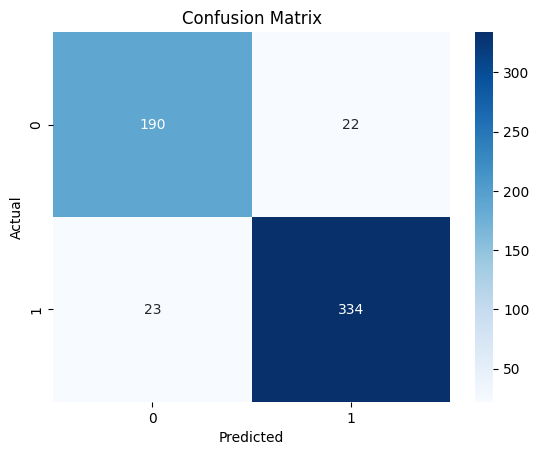

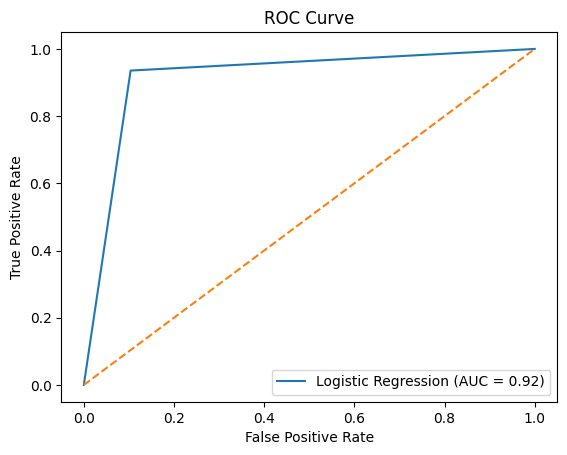

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Initialize 10-fold stratified split
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize variables to store predictions and real values
all_preds = []
all_y_test = []

# Loop through each fold
for train_index, test_index in kf.split(X, y):
    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Store predictions and real values
    preds = model.predict_proba(X_test)[:, 1]
    all_preds.extend(preds)
    all_y_test.extend(y_test)

# Calculate metrics
balanced_acc = balanced_accuracy_score(all_y_test, np.round(all_preds))
roc_auc = roc_auc_score(all_y_test, all_preds)

# Print metrics
print(f"Balanced Accuracy: {balanced_acc:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Confusion Matrix Heatmap
conf_mat = confusion_matrix(all_y_test, np.round(all_preds))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_y_test, all_preds)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
